In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/justificativas_amostra.csv", sep='|', quotechar = '\"')

In [166]:
df.head()

,arquivo,id,numero,tipo,texto_anterior,justificativa,full_text,siglaTipo,codTema,tema,relevancia
0,278680_3_PLV.pdf,3PLV,3,PLV,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,PLV,44,Direitos Humanos e Minorias,0
1,278680_3_PLV.pdf,3PLV,3,PLV,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,PLV,70,Finanças Públicas e Orçamento,0
4,278680_3_PLV.pdf,3PLV,3,PLV,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,PLV,56,Saúde,0


In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.text import *
DIRECTORY_PATH = '/home/semarm/embeddings-leis/'
bs=32

In [6]:
torch.cuda.set_device(1)

In [7]:
home_dir = Path(DIRECTORY_PATH)
data_dir = Path('/home/semarm/embeddings-leis/data')
models_dir = Path("/home/semarm/embeddings-leis/models")
home_dir.ls()

[PosixPath('/home/semarm/embeddings-leis/proposicoes.zip'),
 PosixPath('/home/semarm/embeddings-leis/proposicoes'),
 PosixPath('/home/semarm/embeddings-leis/pdfs'),
 PosixPath('/home/semarm/embeddings-leis/Untitled.ipynb'),
 PosixPath('/home/semarm/embeddings-leis/POC'),
 PosixPath('/home/semarm/embeddings-leis/data'),
 PosixPath('/home/semarm/embeddings-leis/text'),
 PosixPath('/home/semarm/embeddings-leis/README.md'),
 PosixPath('/home/semarm/embeddings-leis/scripts'),
 PosixPath('/home/semarm/embeddings-leis/2006-2007'),
 PosixPath('/home/semarm/embeddings-leis/.ipynb_checkpoints'),
 PosixPath('/home/semarm/embeddings-leis/output'),
 PosixPath('/home/semarm/embeddings-leis/export_POC'),
 PosixPath('/home/semarm/embeddings-leis/.git'),
 PosixPath('/home/semarm/embeddings-leis/proposicoes-temas'),
 PosixPath('/home/semarm/embeddings-leis/pdfs.tar.gz'),
 PosixPath('/home/semarm/embeddings-leis/2008-2010'),
 PosixPath('/home/semarm/embeddings-leis/.gitignore'),
 PosixPath('/home/semarm/

In [10]:
df_lm = pd.read_csv("data/justificativas_10-06.csv", sep = '|', quotechar = '\"')

In [11]:
df_lm.head()

,arquivo,id,numero,tipo,texto_anterior,justificativa
0,278680_3_PLV.pdf,278680,3,PLV,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,NaN
1,382959_110_PRC.pdf,382959,110,PRC,"PROJETO DE RESOLUÇÃO NO , DE 2008 (Da Sra. V...",O projeto de resolução que estamos apresentand...
2,490979_2_PLP.pdf,490979,2,PLP,"PROJETO DE LEI COMPLEMENTAR N.º , de 2011 (D...",para a não execução de gastos relativos ao rel...
3,533892_132_PEC.pdf,533892,132,PEC,PROPOSTA DE EMENDA À CONSTITUIÇÃO N.° ________...,Desnecessário afirmar que a concessão de meios...
4,2076593_4258_PL.pdf,2076593,4258,PL,CÂMARA DOS DEPUTADOS PROJETO DE LEI N° _______...,"O art. 60 da Lei nº 12.249, de 11 de junho de ..."


In [207]:
df_lm = df_lm.fillna('')
df_lm['id'] = df_lm['numero'].map(str) + df_lm['tipo']
df_lm['full_text'] = df_lm['texto_anterior'] + df_lm['justificativa']

In [208]:
df_lm.head()

,arquivo,id,numero,tipo,texto_anterior,justificativa,full_text,siglaTipo
0,278680_3_PLV.pdf,3PLV,3,PLV,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,,CÂMARA DOS DEPUTADOS MEDIDA PROVISÓRIA N.º 22...,PLV
1,382959_110_PRC.pdf,110PRC,110,PRC,"PROJETO DE RESOLUÇÃO NO , DE 2008 (Da Sra. V...",O projeto de resolução que estamos apresentand...,"PROJETO DE RESOLUÇÃO NO , DE 2008 (Da Sra. V...",PRC
2,490979_2_PLP.pdf,2PLP,2,PLP,"PROJETO DE LEI COMPLEMENTAR N.º , de 2011 (D...",para a não execução de gastos relativos ao rel...,"PROJETO DE LEI COMPLEMENTAR N.º , de 2011 (D...",PLP
3,533892_132_PEC.pdf,132PEC,132,PEC,PROPOSTA DE EMENDA À CONSTITUIÇÃO N.° ________...,Desnecessário afirmar que a concessão de meios...,PROPOSTA DE EMENDA À CONSTITUIÇÃO N.° ________...,PEC
4,2076593_4258_PL.pdf,4258PL,4258,PL,CÂMARA DOS DEPUTADOS PROJETO DE LEI N° _______...,"O art. 60 da Lei nº 12.249, de 11 de junho de ...",CÂMARA DOS DEPUTADOS PROJETO DE LEI N° _______...,PL


In [36]:
data_lm = (TextList.from_df(pd.concat([df_lm]), cols="full_text")
              .split_by_rand_pct(0.2)
              .label_for_lm()
              .databunch(bs=bs, num_workers=8))
#               .add_test(TextList.from_df(df_test, cols=['text'])) 
# data_lm
len(data_lm.vocab.itos),len(data_lm.train_ds)
data_lm

TextLMDataBunch;

Train: LabelList (608 items)
x: LMTextList
xxbos xxup câmara xxup dos xxup deputados xxup medida xxup provisória xxmaj n.º xxunk , xxup de 2004 xxup projeto xxup de xxup lei xxup de xxup conversão xxmaj nº 3 / 2005 xxmaj regulamenta a parte final do disposto no inciso xxup xxxiii do art . 5o da xxmaj constituição e dá outras providências . o xxmaj congresso xxmaj nacional decreta : xxmaj art . 1o xxmaj esta xxmaj lei regulamenta a parte final do disposto no inciso xxup xxxiii do art . 5o da xxmaj constituição . xxmaj art . 2 ° . o acesso aos documentos públicos de interesse particular , ou de interesse coletivo ou geral , será ressalvado exclusivamente nas hipóteses em que o sigilo seja ou xxunk imprescindível à segurança da sociedade e do xxmaj estado , nos termos do disposto na parte final do inciso xxup xxxiii do art . 5o da xxmaj constituição . xxmaj art . 3o xxmaj os documentos públicos que contenham informações cujo sigilo seja imprescindível à segurança da soci

In [20]:
data_class = None

In [38]:
wiki_weights_fns = ['/home/semarm/embeddings-leis/POC/export_POC/models/wiki_model_10epochs.pth' "/home/semarm/embeddings-leis/POC/export_POC/models/wiki_vocab_10epochs"]

In [47]:
perplexity = Perplexity()
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3, 
                               metrics=[accuracy, perplexity]).to_fp16()

In [ ]:
learn_lm.lr_find()
learn_lm.recorder.plot(suggestion=True)

In [48]:
lr = 1e-1
learn_lm.freeze()
learn_lm.fit_one_cycle(3, max_lr=lr,  moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.726502,4.277042,0.304035,72.027061,00:06
1,3.199246,3.926306,0.330271,50.719284,00:06
2,2.651346,3.631893,0.361843,37.784279,00:06


In [49]:
learn_lm.freeze_to(-2)
learn_lm.fit_one_cycle(1, max_lr=lr/2, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.815067,3.508676,0.378305,33.403999,00:06


In [50]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(1, max_lr=lr/2.6**4, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.315405,3.367666,0.398489,29.010736,00:08


In [44]:
learn_lm.fit_one_cycle(5, max_lr=slice(5e-3/(2.6**4), 5e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.040896,3.422295,0.394913,30.639627,00:08
1,1.949323,3.390236,0.401721,29.672943,00:08
2,1.830673,3.375640,0.404185,29.242992,00:08
3,1.651338,3.428739,0.404065,30.837742,00:08
4,1.525630,3.458613,0.404310,31.772875,00:08


In [51]:
learn_lm.fit_one_cycle(1, max_lr=lr/2.6**4, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,2.060624,3.347060,0.407048,28.419064,00:08


In [355]:
learn_lm.save_encoder('/home/semarm/embeddings-leis/models/language_model_enc')

In [209]:
df_clas = pd.read_csv("data/proposicoesTemas.csv", sep=';')
df_clas = df_clas.dropna(subset=['numero'])
df_clas['id'] = df_clas['numero'].astype(int, errors='ignore').map(str) + df_clas['siglaTipo']
df_clas.head()

,uriProposicao,siglaTipo,numero,ano,codTema,tema,relevancia,id
0,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,921.0,2020.0,70,Finanças Públicas e Orçamento,0,921MPV
1,https://dadosabertos.camara.leg.br/api/v2/prop...,MPV,921.0,2020.0,56,Saúde,0,921MPV
2,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,44,Direitos Humanos e Minorias,0,1600PL
3,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,66,"Indústria, Comércio e Serviços",0,1600PL
4,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,1600.0,2020.0,56,Saúde,0,1600PL


In [333]:
df = pd.merge(df_lm, df_clas, on=['id'] )
print(df.shape)

(6082, 15)


In [334]:
df = df.drop(columns=['ano', 'uriProposicao'])

In [335]:
df.tail()

,arquivo,id,numero_x,tipo,texto_anterior,justificativa,full_text,siglaTipo_x,siglaTipo_y,numero_y,codTema,tema,relevancia
6077,308880_2441_PL.pdf,2441PL,2441,PL,PROJETO DE LEI Dá nova redação aos arts. 20 e...,,PROJETO DE LEI Dá nova redação aos arts. 20 e...,PL,PL,2441.0,51,Estrutura Fundiária,0
6078,308880_2441_PL.pdf,2441PL,2441,PL,PROJETO DE LEI Dá nova redação aos arts. 20 e...,,PROJETO DE LEI Dá nova redação aos arts. 20 e...,PL,PL,2441.0,34,Administração Pública,0
6079,605355_638_MPV.pdf,638MPV,638,MPV,"MEDIDA PROVISÓRIA Nº 638, DE 17 DE JANEIRO DE ...",,"MEDIDA PROVISÓRIA Nº 638, DE 17 DE JANEIRO DE ...",MPV,MPV,638.0,66,"Indústria, Comércio e Serviços",0
6080,2168837_301_PRC.pdf,301PRC,301,PRC,"PROJETO DE RESOLUÇÃO Nº , DE 2018 (Do Sr. ED...",Na rotina de trabalhos do Poder Legislativo Fe...,"PROJETO DE RESOLUÇÃO Nº , DE 2018 (Do Sr. ED...",PRC,PRC,301.0,53,Processo Legislativo e Atuação Parlamentar,0
6081,2168837_301_PRC.pdf,301PRC,301,PRC,"PROJETO DE RESOLUÇÃO Nº , DE 2018 (Do Sr. ED...",Na rotina de trabalhos do Poder Legislativo Fe...,"PROJETO DE RESOLUÇÃO Nº , DE 2018 (Do Sr. ED...",PRC,PRC,301.0,44,Direitos Humanos e Minorias,0


In [336]:
df['id_tema'] = df['id'] + df['codTema'].map(str)
df = df.drop_duplicates(subset='id_tema')
df.shape

(2039, 14)

In [344]:
df_final = df.copy()
df_final['target'] = ''
for idx in df_final['id'].unique():
#     print(idx)
    aux = df_final[df_final['id'] == idx]
#     print(aux)
    df_final.loc[df_final['id'] == idx, 'target'] = ' '.join(str(x) for x in aux['codTema'].unique())
#     print(aux)
# #     themes = []
#     for i, line in aux.iterrows():
# #         print(line)
#         themes.append(line['codTema'])
# #     print(themes)
# #     print(aux)
# #     aux.iloc[0, -1] = [themes]
#     print(pd.Series([themes] * len(aux)))
#     print(aux)
#     print(aux)
#     break
#     if df_final is None:
#         df_final = aux
#     else:
#         df_final = pd.concat([df_final, aux])
# #     break

df_final = df_final.drop(['codTema', 'tema', 'id_tema'], axis=1)

In [347]:
df_final = df_final.drop_duplicates()

In [353]:
bs=48
data_class = (TextList.from_df(df_final, cols="full_text", vocab=data_lm.vocab)
              .split_by_rand_pct(0.3)
              .label_from_df(cols='target', label_delim=' ')
              .databunch(bs=bs, num_workers=8))
#               .add_test(TextList.from_df(df_test, cols=['text'])) 
data_class

TextClasDataBunch;

Train: LabelList (346 items)
x: TextList
xxbos xxup câmara xxup dos xxup deputados xxup medida xxup provisória xxmaj n.º xxunk , xxup de 2004 xxup projeto xxup de xxup lei xxup de xxup conversão xxmaj nº 3 / 2005 xxmaj regulamenta a parte final do disposto no inciso xxup xxxiii do art . 5o da xxmaj constituição e dá outras providências . o xxmaj congresso xxmaj nacional decreta : xxmaj art . 1o xxmaj esta xxmaj lei regulamenta a parte final do disposto no inciso xxup xxxiii do art . 5o da xxmaj constituição . xxmaj art . 2 ° . o acesso aos documentos públicos de interesse particular , ou de interesse coletivo ou geral , será ressalvado exclusivamente nas hipóteses em que o sigilo seja ou xxunk imprescindível à segurança da sociedade e do xxmaj estado , nos termos do disposto na parte final do inciso xxup xxxiii do art . 5o da xxmaj constituição . xxmaj art . 3o xxmaj os documentos públicos que contenham informações cujo sigilo seja imprescindível à segurança da soci

In [356]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

learn_c = text_classifier_learner(data_class,
                                  AWD_LSTM,
                                  metrics=[acc_02, f_score]).to_fp16()

learn_c.load_encoder(home_dir/'models/language_model_enc')
learn_c.model


SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(12952, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(12952, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 1152, batch_first=True)
        )
        (1): WeightDropout(
          (module): LSTM(1152, 1152, batch_first=True)
        )
        (2): WeightDropout(
          (module): LSTM(1152, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
        (1): RNNDropout()
        (2): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.4, inplace=False)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace=True)
      (4): BatchNorm1d(50, 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-02
Min loss divided by 10: 1.32E-01


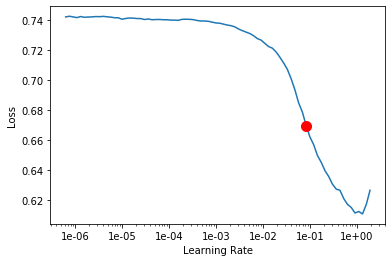

In [357]:
learn_c.lr_find()
learn_c.recorder.plot(suggestion=True)

In [359]:
lr = 1e-1
learn_c.freeze()
learn_c.fit_one_cycle(5, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.695162,0.540694,0.259685,0.363796,00:42
1,0.541144,0.364051,0.661261,0.449491,00:42
2,0.467468,0.362264,0.729054,0.444476,00:42
3,0.427779,0.349635,0.779505,0.443486,00:42
4,0.400357,0.347404,0.787838,0.434932,00:43


In [360]:
learn_c.unfreeze()
learn_c.fit_one_cycle(5, lr/(2.6**4), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.320884,0.351483,0.776802,0.436152,00:42
1,0.320862,0.356394,0.764189,0.419319,00:43
2,0.320055,0.352837,0.760135,0.437172,00:43
3,0.317379,0.339143,0.774099,0.463039,00:43
4,0.316678,0.331955,0.784685,0.476788,00:43
